# Your Info
#### Please fill out the following questions:

#### Your name:

Meryl Duff

#### Your email:

duff.meryl@gmail.com

Task:
Your task for quiz 3 is to write **python code** (in a Jupyter Notebok) OR a **python script** (.py file) that:
- Imports the libraries you need
- Reads in the data: data/nba_rookies.csv
- Processes data:
    1. Set the 'Name' column as the index
    2. Converts the 'TARGET_5Yrs' column to 0/1 using 0 for 'No' and 1 for 'Yes'
- Models data using any classification algorithm you would like
    - If you do not know what to do here, feel free to fit a Logistic Regression model with default hyperparameters. But you are free to use any other model or methods that you know if you think that would be better!
    - Use a random state of 42 when splitting your data into training and testing
    - Use ALL columns (except your target) as your X matrix
- Generates predictions on your test data
- Creates a new DataFrame that has:
    1. One column called 'predictions' which is the predictions from your model on your test data
    2. An index that is the name of the player associated with the prediction from your test data
- Writes the DataFrame with the predictions to a csv called 'predictions.csv' in the data folder in this repository

Fill free to write this script in a Jupyter Notebook! Don't forget to add comments.
As a bonus, you can write it in this .py script.
This script should be able to be run in your terminal: python 03-quiz.py
Fill in this .py file with your solutions. Comments of the above instructions are included to guide your workflow.

In [61]:
# Import the libraries you need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Read in the data: data/nba_rookies.csv
nba = pd.read_csv('./data/nba_rookies.csv')

In [4]:
nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,No
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,No
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,No
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,Yes
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,Yes


In [22]:
# Process data:
# 1. Set the 'Name' column as the index

nba.set_index('Name', inplace= True)

In [28]:
# 2. Convert the 'TARGET_5Yrs' column to 0/1 using 0 for 'No' and 1 for 'Yes'

nba['TARGET_5Yrs'].replace('No',0, inplace=True)
nba['TARGET_5Yrs'].replace('Yes',1, inplace=True)


In [30]:
nba.head(2)

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0


In [ ]:
# Model data using any classification algorithm you would like
# If you do not know what to do here, feel free to fit a Logistic Regression model with default hyperparameters
# But you are free to use any other model or methods that you know if you think that would be better!
# Use a random state of 42 when splitting your data into training and testing

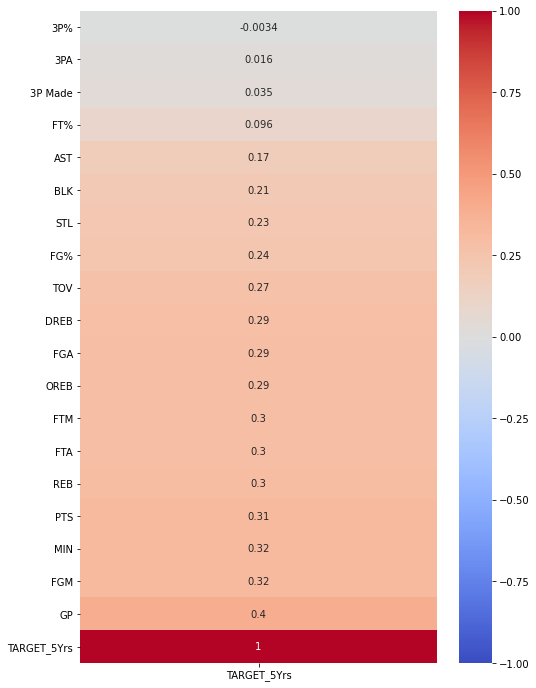

In [31]:
#breakfast-hour/quiz-reviews/03-quiz-review/03-quiz-review-FILLED.ipynb
plt.figure(figsize=(8, 12))
sns.heatmap(nba.corr()[['TARGET_5Yrs']].sort_values('TARGET_5Yrs'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

In [58]:
X=nba[['GP', 'FGM','MIN','PTS','REB','FTA','FTM']]
y=nba['TARGET_5Yrs']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)
lgr = LogisticRegression(solver='liblinear')
lgr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [64]:
lgr.score(X_train,y_train), lgr.score(X_test,y_test)

(0.6987951807228916, 0.7447447447447447)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
X=nba[['GP', 'FGM','MIN','PTS','REB','FTA','FTM']]
y=nba['TARGET_5Yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

knn = KNeighborsClassifier()

In [74]:
knn.fit(Z_train, y_train)
knn.score(Z_train, y_train),knn.score(Z_test, y_test)

(0.7580321285140562, 0.6936936936936937)

In [73]:
X=nba.drop(columns='TARGET_5Yrs')
y=nba['TARGET_5Yrs']

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(Z_train, y_train)
knn.score(Z_train, y_train), knn.score(Z_test,y_test)

(0.7580321285140562, 0.6936936936936937)

In [80]:
# Generate predictions on your test data
y_preds= knn.predict(X)

In [81]:
# Create a new DataFrame for predictions
# 2. Have one column called 'predictions'
# which is the predictions from your model on your test data


nba['preds'] = y_preds

In [85]:
# 1. Have an index that is the name of the player
nba_preds = nba[['preds']]
nba_preds

,preds
Name,
Brandon Ingram,1
Andrew Harrison,1
JaKarr Sampson,1
Malik Sealy,1
Matt Geiger,1
...,...
Chris Smith,1
Brent Price,1
Marlon Maxey,1


In [86]:
# Write the DataFrame you created to a csv called 'predictions.csv'
# in the data folder in this repository
nba_preds.to_csv('./data/predictions.csv')